In [1]:
pip install transformers

In [2]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import re
import preprocessing


# Read the CSV file
input_Training_csv_file = 'training_without_emojis_emoticons.csv'
input_Testing_csv_file = 'testing_without_emojis_emoticons.csv'


# Read the CSV file into a DataFrame
df = pd.read_csv(input_Training_csv_file, sep=',',
                          names=["label", "comment"])

df2 = pd.read_csv(input_Testing_csv_file, sep=',',
                          names=["label", "comment"])

# Apply the transformation function to the first column
df['comment'] = df['comment'].apply(preprocessing.preprocess_text)
df2['comment'] = df2['comment'].apply(preprocessing.preprocess_text)

df.head()


,label,comment
0,positive,everspace 2 is the best space game i have play...
1,positive,everspace 2 let us me live out the outer space...
2,positive,i miss csgo
3,positive,nice game but pls improve you are anti cheat
4,positive,just finished the main story. pretty good game...


In [4]:
df2.head()

,label,comment
0,positive,amazing game by a company that actually cares....
1,positive,do not let the graphics fool you. this is a gr...
2,positive,at this point terraria is cultural cornerstone...
3,positive,perhaps my greatest purchase of all time getti...
4,positive,terraria is a really fun to keep you entertain...


In [5]:
x_train=list(df['comment'])
y_train=list(df['label'])
x_test=list(df2['comment'])
y_test=list(df2['label'])
y_train

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

In [6]:
y_train=list(pd.get_dummies(y_train,drop_first=True)['positive'])
y_test=list(pd.get_dummies(y_test,drop_first=True)['positive'])

In [7]:
x_train

['everspace 2 is the best space game i have played in a very long time.',
 'everspace 2 let us me live out the outer spacerelated dreams of my youth thanks to its open space exploration and welldesigned spacecraft combat.',
 'i miss csgo',
 'nice game but pls improve you are anti cheat',
 'just finished the main story. pretty good game almost no bugs.',
 'best sandbox game on steam',
 'get past the bugs and the game is actually pretty good',
 'great game. great graphics great storyline. highly recommend! they did it perfect!',
 'the witcher world is so vivid so real so strange so esoteric yet so grounded. there are magic unicorns castles in the cloud yet you can relate to the people inside.',
 'cdpr did a great job translating the books into games. you see the pain and sorrow of different characters.',
 'if tekken has 100 fans i am one of them. if tekken has 10 fans i am one of them. if tekken has 1 fan i am him. if tekken has no fans i have died.',
 'best fighting game + best communit

In [8]:
x_test

['amazing game by a company that actually cares. once they decided to move on from working on the game they added modding support for it. they care. recommend this game.',
 'do not let the graphics fool you. this is a great game.',
 'at this point terraria is cultural cornerstone in pc gaming.',
 'perhaps my greatest purchase of all time getting this at the start of the covid period was a blessing in disguise as it have me much more freedom to play i have spent many hours in this game and the modded equivalent and i regret none of it. this game brought me life.',
 'terraria is a really fun to keep you entertained for countless hours great game for quarantine',
 '1000 hours of my life wasted on this game. i have no regrets.',
 'wonderful game. the game of my childhood. a lot of fun items bosses npc e.t.c. especially good with friends.',
 'this game is amazing someone should majorly fund this game studio and make them bring many more dnd campaigns to life in this same way like they did w

In [9]:
from transformers import TFAutoModel, AutoModel, AutoTokenizer, DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [10]:
train_encodings = tokenizer(x_train, truncation=True, padding=True)
test_encodings = tokenizer(x_test, truncation=True, padding=True)

In [11]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [12]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00


In [13]:
pip install scikit-learn matplotlib

In [14]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

def compute_metrics(eval_pred):
  load_accuracy = load_metric("accuracy")
  load_f1 = load_metric("f1")
  load_recall = load_metric("recall")


  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
  f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
  recall = load_recall.compute(predictions=predictions, references=labels)["recall"]

  precision = precision_score(y_true=labels, y_pred=predictions, average='weighted')
  metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
  values = [accuracy, f1, precision, recall]

  plt.bar(metrics, values)
  plt.xlabel("Metrics")
  plt.ylabel("Values")
  plt.title("Model Evaluation Metrics")
  plt.show()

  return {"accuracy": accuracy,"precision": precision, "f1": f1, "recall": recall}

In [15]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.1 MB/s eta 0:00:00


In [16]:
from transformers import TFDistilBertForSequenceClassification, TFTrainingArguments, TFTrainer

training_args = TFTrainingArguments(
   output_dir='./results',
   per_device_train_batch_size=8,
   per_device_eval_batch_size=8,
   num_train_epochs=3,
   weight_decay=0.01,
   learning_rate=1e-5,
   eval_steps=100
)

In [17]:
with training_args.strategy.scope():
  model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer (
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [18]:
trainer.train()

<ipython-input-14-efc2a80c4a6e>:7: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


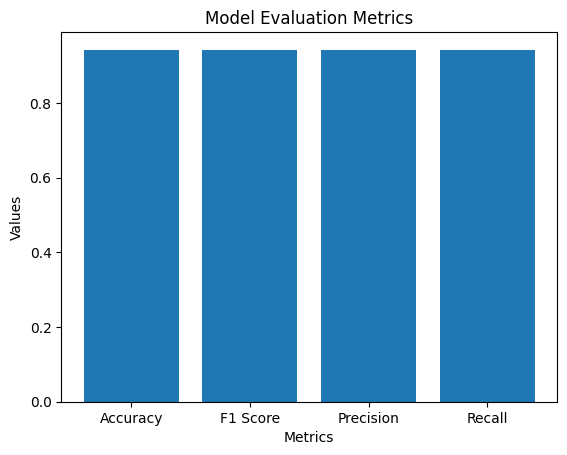

{'eval_loss': 0.15912740309159834,
 'eval_accuracy': 0.9423076923076923,
 'eval_precision': 0.9423076923076923,
 'eval_f1': 0.9421487603305785,
 'eval_recall': 0.9421487603305785}

In [19]:
trainer.evaluate(test_dataset)

In [20]:
trainer.save_model('distilbert_trained_with_game_reviews')

In [21]:
from google.colab import files

In [22]:
files.download('/content/distilbert_trained_with_game_reviews/tf_model.h5')

In [23]:
files.download('/content/distilbert_trained_with_game_reviews/config.json')